In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [70]:
def get_column(data, index):
    result = data.iloc[:, index]
    return result
def prepare_data(file_name_dataset):
    data = pd.read_csv(file_name_dataset)
    #data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header = 1).tolist()
    tv_data = get_column(data,0)
    radio_data = get_column(data,1)
    newspaper_data = get_column(data,2)
    sales_data = get_column(data,3)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [71]:
file_name_dataset = "advertising.csv"
X,y = prepare_data(file_name_dataset)
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.1, 300.5, 78.9]


In [73]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            y_hat = predict(x1,x2,x3,w1,w2,w3,b)
            loss = compute_loss_mse(y, y_hat)
            dl_dw1 = compute_gradient_wi(x1,y,y_hat)
            dl_dw2 = compute_gradient_wi(x2,y,y_hat)
            dl_dw3 = compute_gradient_wi(x3,y,y_hat)
            dl_db = compute_gradient_b(y,y_hat)
            w1 = update_weight_wi(w1,dl_dw1, lr)
            w2 = update_weight_wi(w2,dl_dw2, lr)
            w3 = update_weight_wi(w3,dl_dw3, lr)
            b = update_weight_b(b,dl_db, lr)
            losses.append(loss)
    return (w1,w2,w3,b, losses)
    

In [74]:
def initialize_params():
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b  = 0
    return w1, w2,w3, b

In [75]:
def initialize_params():
    w1,w2,w3,b = (0.016992259082509283, 0.0070783670518262355,-0.002307860847821344, 0)
    return w1,w2,w3,b

In [76]:
def predict(x1,x2,x3,w1,w2,w3,b):
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

In [77]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print(y)

1.0


In [16]:
def compute_loss_mse(y_hat,y):
    loss = (y_hat - y)**2
    return loss

In [78]:
l = compute_loss ( y_hat =1 , y =0.5)
print(l)

0.25


In [22]:
def compute_loss_mae(y_hat,y):
    loss = abs(y_hat - y)
    return loss

In [20]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

In [79]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [80]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [84]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi
def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

In [88]:
after_wi = update_weight_wi( 1.0 ,  -0.5 , 1e-5)
print ( after_wi )

1.000005


In [90]:
after_b = update_weight_b (0.5 ,-1.0 , 1e-5)
print ( after_b )
print ( after_wi )

0.50001
1.000005


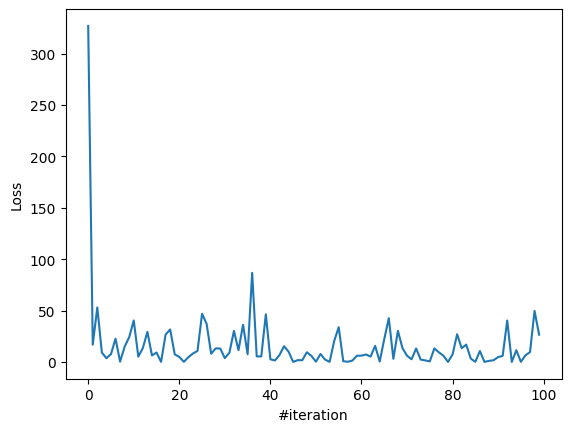

In [21]:
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [93]:
X , y = prepare_data ( 'advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
print ( w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [94]:
tv = 19.2
radio = 35.9
newspaper = 51.3
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


In [96]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


In [99]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            y_hat = predict(x1,x2,x3,w1,w2,w3,b)
            loss = compute_loss_mse(y, y_hat)
            
            dl_dw1 = compute_gradient_wi(x1,y,y_hat)
            dl_dw2 = compute_gradient_wi(x2,y,y_hat)
            dl_dw3 = compute_gradient_wi(x3,y,y_hat)
            dl_db = compute_gradient_b(y,y_hat)
            loss_total = loss_total + loss
            dw1_total = dw1_total + dl_dw1
            dw2_total = dw2_total + dl_dw2
            dw3_total = dw3_total + dl_dw3
            db_total = db_total + dl_db
            
        w1 = update_weight_wi(w1,dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3,dw3_total /N, lr)
        b = update_weight_b(b,   db_total/N, lr)
            
        losses.append(loss_total/N)
    return (w1,w2,w3,b, losses)
    

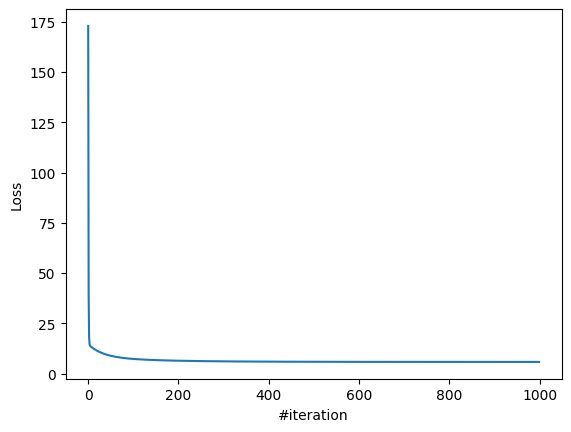

In [100]:
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y, epoch_max = 1000, lr = 1e-5)
plt.plot(losses)
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [102]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y ,1000 ,1e-5)
print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [108]:
def get_column(data, index):
    result = data.iloc[:, index]
    return result
def prepare_data(file_name_dataset):
    data = pd.read_csv(file_name_dataset)
    #data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header = 1).tolist()
    tv_data = get_column(data,0)
    radio_data = get_column(data,1)
    newspaper_data = get_column(data,2)
    sales_data = get_column(data,3)
    X = [[1,x1,x2,x3] for x1,x2,x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [109]:
file_name_dataset = "advertising.csv"
X,y = prepare_data(file_name_dataset)

In [110]:
def initialize_params():
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b  = 0
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    #return [b,w1, w2,w3]

In [111]:
def predict(X_features, weights):
    return np.dot(X_features, weights) 
def compute_loss(y_hat,y):
    return (y_hat-y)**2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = []
    for i in range(len(X_features)):
        if i == 0:
            dl_dweights.append(2*(y_hat-y))
        else:
            dl_dweights.append(2*X_features[i]*(y_hat-y))
    return dl_dweights

def update_weight(weights, dl_weights, lr):
    for i in range(len(dl_weights)):
        weights[i] = weights[i] - lr*dl_weights[i]
    return weights

In [112]:
def implement_linear_regression(X_features, y_output, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print("epoch ", epoch)
        for i in range(N):
            features_i = X_features[i]
            y = y_output[i]
            y_hat = predict(features_i, weights)
            loss = compute_loss(y, y_hat)
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            weights = update_weight(weights, dl_dweights, lr)
            losses.append(loss)
    return weights, losses
    

In [113]:
W, L = implement_linear_regression(X,y)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49


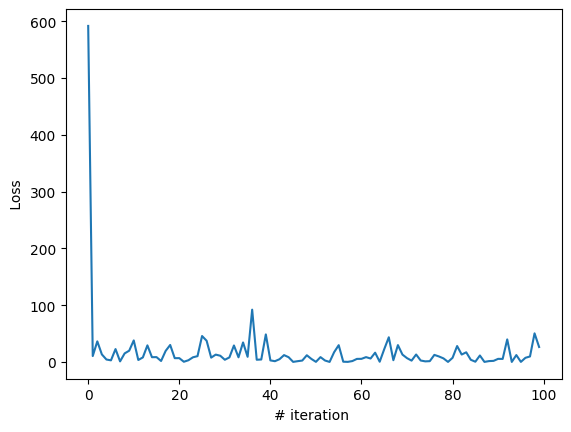

In [114]:
plt . plot ( L[0:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [ ]:
W , L = implement_linear_regression (X , y , 50 , 1e-5)
pr